In [1]:
import numpy as np
import numpy.polynomial.polynomial as npoly
from scipy import optimize
import matplotlib.pyplot as plt
np.random.seed(2017)
import pandas as pd




In [10]:
inn_names=["inn"+str(i+1) for i in range(10)]
df=pd.read_csv("./data-case-roadmap/cost_inn_obj.csv",names=["t"]+inn_names,header=0)

In [11]:
df

,t,inn1,inn2,inn3,inn4,inn5,inn6,inn7,inn8,inn9,inn10
0,0.00,1.998749,1.999132,3.999678,4.001589,2.000555,3.002223,2.013133,3.999678,2.997767,4.001589
1,1.25,2.112496,1.837645,3.784734,3.819229,2.005368,2.852720,2.007092,3.784734,3.016996,3.819229
2,2.50,2.199090,1.780252,3.633355,3.677526,2.005466,2.744708,2.024053,3.633355,3.033613,3.677526
3,3.75,2.267788,1.760007,3.532541,3.568172,2.004772,2.668300,2.056218,3.532541,3.048341,3.568172
4,5.00,2.324426,1.754622,3.470065,3.484455,2.005566,2.616603,2.098290,3.470065,3.061797,3.484455
5,6.25,2.372959,1.756473,3.436175,3.421099,2.009106,2.584577,2.146726,3.436175,3.074547,3.421099
6,7.50,2.416148,1.762789,3.423676,3.374001,2.016026,2.568419,2.199201,3.423676,3.087100,3.374001
7,8.75,2.455954,1.772433,3.427436,3.339982,2.026576,2.565201,2.254227,3.427436,3.099901,3.339982
8,10.00,2.493774,1.784841,3.443846,3.316580,2.040791,2.572643,2.310890,3.443846,3.113330,3.316580
9,11.25,2.530611,1.799673,3.470369,3.301893,2.058575,2.588948,2.368657,3.470369,3.127703,3.301893


In [12]:
inn_reg=pd.DataFrame(columns=["Inn","C0R1","C1R1","C0R2","C1R2","C0R3","C1R3","C0R4","C1R4","C0R5","C1R5"])
inn_xrang=pd.DataFrame(columns=["R0","R1","R2","R3","R4","R5"])
inn_yrang=pd.DataFrame(columns=["Y0","Y1","Y2","Y3","Y4","Y5"])

y = 2.010474219345072 + 0.07149691194044425·x¹, if x in [0.0, 3.75]
y = 2.1772596221474085 + 0.031198628125624944·x¹, if x in [5.0, 21.25]
y = 1.95080229711044 + 0.04152790325013843·x¹, if x in [22.5, 31.25]
y = 1.5711713558226568 + 0.05340673759121469·x¹, if x in [32.5, 41.25]
y = 1.046421254107381 + 0.06597779253919742·x¹, if x in [42.5, 50.0]


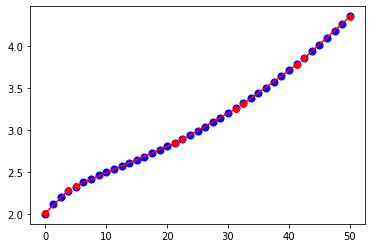

y = 1.9991322114191135 - 0.1291897786718213·x¹, if x in [0.0, 1.25]
y = 1.7681452848577774 - 0.0006606272697665059·x¹, if x in [2.5, 8.75]
y = 1.5862976168437957 + 0.018535341279819817·x¹, if x in [10.0, 22.5]
y = 1.2968796934556068 + 0.031159574473936094·x¹, if x in [23.75, 36.25]
y = 0.8379165386359962 + 0.04356904441963251·x¹, if x in [37.5, 50.0]


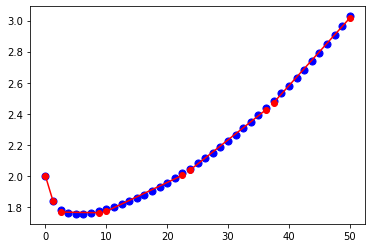

y = 3.970495376107808 - 0.12422320974621456·x¹, if x in [0.0, 3.75]
y = 3.4400059308558437 + 0.0006467820809201004·x¹, if x in [5.0, 11.25]
y = 2.8852827559883383 + 0.04779408755515137·x¹, if x in [12.5, 22.5]
y = 2.228726553344319 + 0.0760895148886092·x¹, if x in [23.75, 36.25]
y = 1.24967053883994 + 0.10261253858878554·x¹, if x in [37.5, 50.0]


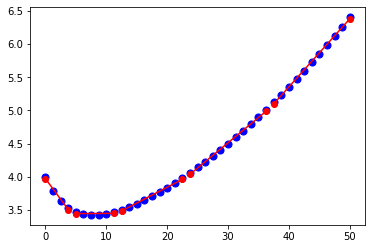

y = 3.982922039123031 - 0.11535624559077083·x¹, if x in [0.0, 3.75]
y = 3.607073687640134 - 0.028808876880948856·x¹, if x in [5.0, 11.25]
y = 3.1394352483656074 + 0.01090880112249443·x¹, if x in [12.5, 22.5]
y = 2.6154694559883924 + 0.03350824389635553·x¹, if x in [23.75, 36.25]
y = 1.8296102738349187 + 0.05480197287376257·x¹, if x in [37.5, 50.0]


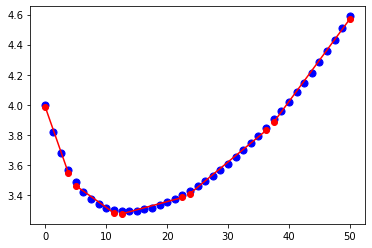

y = 1.9988813039566293 + 0.002353843619771552·x¹, if x in [0.0, 8.75]
y = 1.826881388817273 + 0.02061145657593037·x¹, if x in [10.0, 17.5]
y = 1.5577155836635816 + 0.03549303734698477·x¹, if x in [18.75, 27.5]
y = 1.1994438751724117 + 0.0481855006213357·x¹, if x in [28.75, 38.75]
y = 0.6861525476540592 + 0.061204520237347786·x¹, if x in [40.0, 50.0]


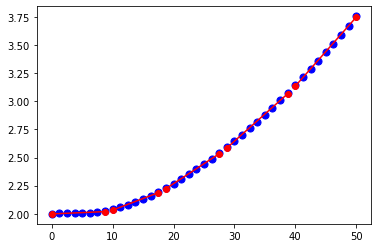

y = 2.9834548723187284 - 0.08878241669034882·x¹, if x in [0.0, 3.75]
y = 2.615657508581327 - 0.004052394425426978·x¹, if x in [5.0, 11.25]
y = 2.1386130299818604 + 0.03639653264763575·x¹, if x in [12.5, 22.5]
y = 1.6374457520389094 + 0.05811310694824443·x¹, if x in [23.75, 36.25]
y = 0.9226537891565882 + 0.07746697186759995·x¹, if x in [37.5, 50.0]


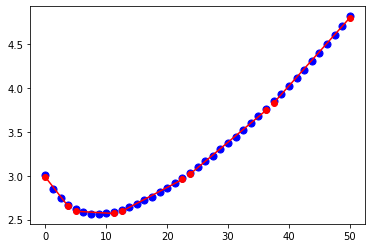

y = 2.003191441140602 + 0.011697346157237208·x¹, if x in [0.0, 3.75]
y = 1.8571187374726221 + 0.045948538536013966·x¹, if x in [5.0, 17.5]
y = 1.6926852456462176 + 0.05495813263155136·x¹, if x in [18.75, 30.0]
y = 1.323636108256262 + 0.06708419652327982·x¹, if x in [31.25, 40.0]
y = 0.7721418188514801 + 0.08061953460266492·x¹, if x in [41.25, 50.0]


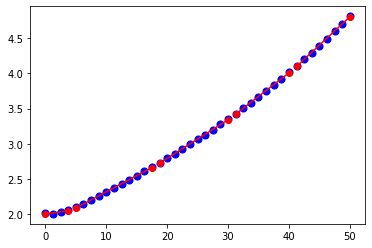

y = 3.970495376107808 - 0.12422320974621456·x¹, if x in [0.0, 3.75]
y = 3.4400059308558437 + 0.0006467820809201004·x¹, if x in [5.0, 11.25]
y = 2.8852827559883383 + 0.04779408755515137·x¹, if x in [12.5, 22.5]
y = 2.228726553344319 + 0.0760895148886092·x¹, if x in [23.75, 36.25]
y = 1.24967053883994 + 0.10261253858878554·x¹, if x in [37.5, 50.0]


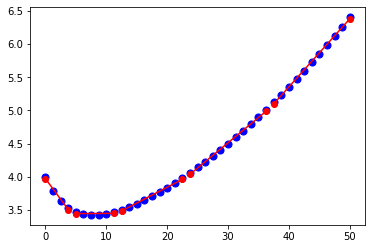

y = 3.0019822645639462 + 0.011463760921060152·x¹, if x in [0.0, 15.0]
y = 2.84233474914531 + 0.021649274218178558·x¹, if x in [16.25, 23.75]
y = 2.5511472183418635 + 0.03357136887317518·x¹, if x in [25.0, 32.5]
y = 2.1309474116807006 + 0.04624510229903352·x¹, if x in [33.75, 41.25]
y = 1.5663991459394546 + 0.05971355257151872·x¹, if x in [42.5, 50.0]


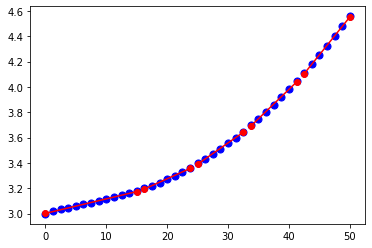

y = 3.982922039123031 - 0.11535624559077083·x¹, if x in [0.0, 3.75]
y = 3.607073687640134 - 0.028808876880948856·x¹, if x in [5.0, 11.25]
y = 3.1394352483656074 + 0.01090880112249443·x¹, if x in [12.5, 22.5]
y = 2.6154694559883924 + 0.03350824389635553·x¹, if x in [23.75, 36.25]
y = 1.8296102738349187 + 0.05480197287376257·x¹, if x in [37.5, 50.0]


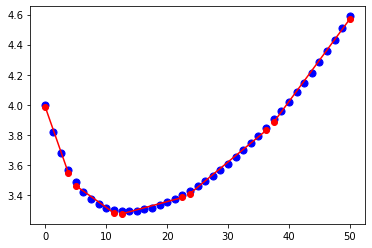

In [13]:
for inn in [i+1 for i in range(10)]:
    def f(breakpoints, x, y, fcache):
        breakpoints = tuple(map(int, sorted(breakpoints)))
        if breakpoints not in fcache:
            total_error = 0
            for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
                total_error += ((f(xi) - yi)**2).sum()
            fcache[breakpoints] = total_error
        # print('{} --> {}'.format(breakpoints, fcache[breakpoints]))
        return fcache[breakpoints]

    def find_best_piecewise_polynomial(breakpoints, x, y):
        breakpoints = tuple(map(int, sorted(breakpoints)))
        xs = np.split(x, breakpoints)
        ys = np.split(y, breakpoints)
        result = []
        for xi, yi in zip(xs, ys):
            if len(xi) < 2: continue
            coefs = npoly.polyfit(xi, yi, 1)
            f = npoly.Polynomial(coefs)
            result.append([f, xi, yi])
        return result

    x = np.array(df.t)
    y = np.array(df["inn"+str(inn)])

    num_breakpoints = 4
    breakpoints = optimize.brute(
        f, [slice(1, len(x), 1)]*num_breakpoints, args=(x, y, {}), finish=None)
    count=1
    plt.scatter(x, y, c='blue', s=50)
    for f, xi, yi in find_best_piecewise_polynomial(breakpoints, x, y):
        x_interval = np.array([xi.min(), xi.max()])
        inn_reg.loc[inn,"C0R"+str(count)]=round(f.convert().coef[0],3)
        inn_reg.loc[inn,"C1R"+str(count)]=round(f.convert().coef[1],3)
        inn_xrang.loc[inn,"R"+str(count)]=x_interval[1]
        inn_yrang.loc[inn,"Y"+str(count)]=f(x_interval[1])
        print('y = {:35s}, if x in [{}, {}]'.format(str(f), *x_interval))
        count=count+1
        plt.plot(x_interval, f(x_interval), 'ro-')

    inn_reg.loc[inn,"Inn"]=inn
    inn_xrang.loc[inn,"R0"]=0.0
    inn_yrang.loc[inn,"Y0"]=0.0
    #inn_xrang.loc[inn,"Inn"]=inn
    plt.show()
 

https://stackoverflow.com/questions/46218934/piecewise-linear-fit-with-n-breakpoints

In [14]:
inn_reg

,Inn,C0R1,C1R1,C0R2,C1R2,C0R3,C1R3,C0R4,C1R4,C0R5,C1R5
1,1,2.01,0.071,2.177,0.031,1.951,0.042,1.571,0.053,1.046,0.066
2,2,1.999,-0.129,1.768,-0.001,1.586,0.019,1.297,0.031,0.838,0.044
3,3,3.97,-0.124,3.44,0.001,2.885,0.048,2.229,0.076,1.25,0.103
4,4,3.983,-0.115,3.607,-0.029,3.139,0.011,2.615,0.034,1.83,0.055
5,5,1.999,0.002,1.827,0.021,1.558,0.035,1.199,0.048,0.686,0.061
6,6,2.983,-0.089,2.616,-0.004,2.139,0.036,1.637,0.058,0.923,0.077
7,7,2.003,0.012,1.857,0.046,1.693,0.055,1.324,0.067,0.772,0.081
8,8,3.97,-0.124,3.44,0.001,2.885,0.048,2.229,0.076,1.25,0.103
9,9,3.002,0.011,2.842,0.022,2.551,0.034,2.131,0.046,1.566,0.06
10,10,3.983,-0.115,3.607,-0.029,3.139,0.011,2.615,0.034,1.83,0.055


In [15]:
inn_xrang

,R0,R1,R2,R3,R4,R5
1,0.0,3.75,21.25,31.25,41.25,50.0
2,0.0,1.25,8.75,22.5,36.25,50.0
3,0.0,3.75,11.25,22.5,36.25,50.0
4,0.0,3.75,11.25,22.5,36.25,50.0
5,0.0,8.75,17.5,27.5,38.75,50.0
6,0.0,3.75,11.25,22.5,36.25,50.0
7,0.0,3.75,17.5,30.0,40.0,50.0
8,0.0,3.75,11.25,22.5,36.25,50.0
9,0.0,15.0,23.75,32.5,41.25,50.0
10,0.0,3.75,11.25,22.5,36.25,50.0


In [16]:
inn_yrang

,Y0,Y1,Y2,Y3,Y4,Y5
1,0.0,2.278588,2.84023,3.248549,3.774199,4.345311
2,0.0,1.837645,1.762365,2.003343,2.426414,3.016369
3,0.0,3.504658,3.447282,3.96065,4.986971,6.380297
4,0.0,3.550336,3.282974,3.384883,3.830143,4.569709
5,0.0,2.019477,2.187582,2.533774,3.066632,3.746379
6,0.0,2.650521,2.570068,2.957535,3.744046,4.796002
7,0.0,2.047056,2.661218,3.341429,4.007004,4.803119
8,0.0,3.504658,3.447282,3.96065,4.986971,6.380297
9,0.0,3.173939,3.356505,3.642217,4.038558,4.552077
10,0.0,3.550336,3.282974,3.384883,3.830143,4.569709


In [17]:
inn_reg.to_csv("./data-case-roadmap/inn_reg.csv")
inn_xrang.to_csv("./data-case-roadmap/inn_xrang.csv")
inn_yrang.to_csv("./data-case-roadmap/inn_yrang.csv")